# Shortages of  mental health professionals in the United States

Designation of a Health Provider Shortage Area (HPSA) is used to identify areas, populations groups, or facilities within the United States that are experiencing a shortage of health care professionals. 

In this notebook, the data for HPSAs is downloaded and cleaned for further analysis.
Also, data for the U.S. total population from 2019 is downloaded and added to the HPSA dataframe for further analysis.

## Data Collection

Data for HPSAs was downloaded from the Health Resources and Services Administration
https://data.hrsa.gov/data/download

Data for U.S. population was downloaded from Census Bureau https://www.census.gov/data/tables/time-series/demo/popest/2010s-national-detail.html

In [1]:
import pandas as pd
import numpy as np

pd.options.display.max_columns = 100

In [2]:
# File name for HPSA dataset
file_name = '01_hpsa_mental_health.csv'
# File name for Population dataset
file_pop = 'SCPRC-EST2019-18+POP-RES.csv'
# Folder where files are located
file_path = '../datasets/'

In [3]:
df = pd.read_csv(file_path + file_name, low_memory = False)

In [4]:
df.head(3)

,HPSA Name,HPSA ID,Designation Type,HPSA Discipline Class,HPSA Score,Primary State Abbreviation,HPSA Status,HPSA Designation Date,HPSA Designation Last Update Date,Metropolitan Indicator,HPSA Geography Identification Number,HPSA Degree of Shortage,Withdrawn Date,HPSA FTE,HPSA Designation Population,% of Population Below 100% Poverty,HPSA Formal Ratio,HPSA Population Type,Primary HHS Region Name,Rural Status,Longitude,Latitude,BHCMIS Organization Identification Number,Break in Designation,Common County Name,Common Postal Code,Common Region Name,Common State Abbreviation,Common State County FIPS Code,Common State FIPS Code,Common State Name,County Equivalent Name,County or County Equivalent Federal Information Processing Standard Code,Discipline Class Number,HPSA Address,HPSA City,HPSA Component Name,HPSA Component Source Identification Number,HPSA Component State Abbreviation,HPSA Component Type Code,HPSA Component Type Description,HPSA Designation Population Type Description,HPSA Estimated Served Population,HPSA Estimated Underserved Population,HPSA Metropolitan Indicator Code,HPSA Population Type Code,HPSA Postal Code,HPSA Provider Ratio Goal,HPSA Resident Civilian Population,HPSA Shortage,HPSA Status Code,HPSA Type Code,HPSA Withdrawn Date String,Primary State FIPS Code,Primary State Name,Provider Type,Rural Status Code,State Abbreviation,State and County Federal Information Processing Standard Code,State FIPS Code,State Name,U.S. - Mexico Border 100 Kilometer Indicator,U.S. - Mexico Border County Indicator,Data Warehouse Record Create Date,Data Warehouse Record Create Date Text,Unnamed: 65
0,Milwaukee Upper North,7559883411,High Needs Geographic HPSA,Mental Health,15,WI,Designated,06/08/2011,10/28/2017,Unknown,55079000302,Not applicable,NaN,1.13,57338.0,23.2,50742:1,Geographic Population,Region 5,Non-Rural,NaN,NaN,NaN,N,"Milwaukee County, WI",NaN,Region 5,WI,55079,55,Wisconsin,Milwaukee,079,7,NaN,NaN,3.02,NaN,WI,CT,Census Tract,Geographic Population,22600.0,34738.0,0,TRC,NaN,20000:1,NaN,2.69,D,Hpsa Geo HN,NaN,55,Wisconsin,Psychiatrist,N,WI,55079,55,Wisconsin,N,N,11/19/2020,2020/11/19,NaN
1,Milwaukee Upper North,7559883411,High Needs Geographic HPSA,Mental Health,15,WI,Designated,06/08/2011,10/28/2017,Unknown,55079050102,Not applicable,NaN,1.13,57338.0,23.2,50742:1,Geographic Population,Region 5,Non-Rural,NaN,NaN,NaN,N,"Milwaukee County, WI",NaN,Region 5,WI,55079,55,Wisconsin,Milwaukee,079,7,NaN,NaN,501.02,NaN,WI,CT,Census Tract,Geographic Population,22600.0,34738.0,0,TRC,NaN,20000:1,NaN,2.69,D,Hpsa Geo HN,NaN,55,Wisconsin,Psychiatrist,N,WI,55079,55,Wisconsin,N,N,11/19/2020,2020/11/19,NaN
2,Milwaukee Upper North,7559883411,High Needs Geographic HPSA,Mental Health,15,WI,Designated,06/08/2011,10/28/2017,Unknown,55079000304,Not applicable,NaN,1.13,57338.0,23.2,50742:1,Geographic Population,Region 5,Non-Rural,NaN,NaN,NaN,N,"Milwaukee County, WI",NaN,Region 5,WI,55079,55,Wisconsin,Milwaukee,079,7,NaN,NaN,3.04,NaN,WI,CT,Census Tract,Geographic Population,22600.0,34738.0,0,TRC,NaN,20000:1,NaN,2.69,D,Hpsa Geo HN,NaN,55,Wisconsin,Psychiatrist,N,WI,55079,55,Wisconsin,N,N,11/19/2020,2020/11/19,NaN


Number of rows and columns in this dataset:

In [5]:
df.shape

(26514, 66)

## Data Cleaning

The summary below for the columns was reviewed to identify columns that are not needed for analysis and can be removed from dataset.

In [6]:
df.describe(include = 'all')

,HPSA Name,HPSA ID,Designation Type,HPSA Discipline Class,HPSA Score,Primary State Abbreviation,HPSA Status,HPSA Designation Date,HPSA Designation Last Update Date,Metropolitan Indicator,HPSA Geography Identification Number,HPSA Degree of Shortage,Withdrawn Date,HPSA FTE,HPSA Designation Population,% of Population Below 100% Poverty,HPSA Formal Ratio,HPSA Population Type,Primary HHS Region Name,Rural Status,Longitude,Latitude,BHCMIS Organization Identification Number,Break in Designation,Common County Name,Common Postal Code,Common Region Name,Common State Abbreviation,Common State County FIPS Code,Common State FIPS Code,Common State Name,County Equivalent Name,County or County Equivalent Federal Information Processing Standard Code,Discipline Class Number,HPSA Address,HPSA City,HPSA Component Name,HPSA Component Source Identification Number,HPSA Component State Abbreviation,HPSA Component Type Code,HPSA Component Type Description,HPSA Designation Population Type Description,HPSA Estimated Served Population,HPSA Estimated Underserved Population,HPSA Metropolitan Indicator Code,HPSA Population Type Code,HPSA Postal Code,HPSA Provider Ratio Goal,HPSA Resident Civilian Population,HPSA Shortage,HPSA Status Code,HPSA Type Code,HPSA Withdrawn Date String,Primary State FIPS Code,Primary State Name,Provider Type,Rural Status Code,State Abbreviation,State and County Federal Information Processing Standard Code,State FIPS Code,State Name,U.S. - Mexico Border 100 Kilometer Indicator,U.S. - Mexico Border County Indicator,Data Warehouse Record Create Date,Data Warehouse Record Create Date Text,Unnamed: 65
count,26514,26514,26514,26514,26514.000000,26514,26514,26514,26514,26514,26514,20936,10288,20490.000000,2.224500e+04,17083.000000,13653,20334,26514,23868,6178.000000,6178.000000,1624,26514,26514,5919.000000,26514,26514,26514,26514.000000,26514,26514,26514,26514.0,5866,5925,26514,6180,20334,26514,26514,26514,1.711800e+04,1.711800e+04,26514,20333,5919,18230,3.568000e+03,20155.000000,26514,26514,10288,26514.000000,26514,17137,23868,26514,26514,26514.000000,26514,26514,26514,26514,26514,0.0
unique,8192,8730,11,1,NaN,59,3,2066,651,4,15293,29,248,NaN,NaN,NaN,1196,11,10,5,NaN,NaN,1561,1,3208,NaN,10,59,3208,NaN,59,1954,344,NaN,5453,3076,16261,6180,59,4,4,19,NaN,NaN,4,10,5406,8,NaN,NaN,3,13,248,NaN,59,3,5,59,3209,NaN,59,3,2,1,1,NaN
top,LI-Chicago Northeast,7172628215,HPSA Population,Mental Health,NaN,CA,Designated,08/18/2019,06/25/2019,Unknown,POINT,Not applicable,06/25/2019,NaN,NaN,NaN,114517:1,Geographic Population,Region 9,Non-Rural,NaN,NaN,09E01293,N,"Cook County, IL",NaN,Region 9,CA,17031,NaN,California,Cook,031,NaN,Airport Rd,Los Angeles,7,7134193669,CA,CT,Census Tract,Geographic Population,NaN,NaN,0,TRC,99559,20000:1,NaN,NaN,D,Hpsa Pop,2019/06/25,NaN,California,Psychiatrist,N,CA,17031,NaN,California,N,N,11/19/2020,2020/11/19,NaN
freq,269,269,9942,26514,NaN,3622,15873,1419,2097,20130,6180,20334,2145,NaN,NaN,NaN,269,10402,5966,15118,NaN,NaN,4,26514,1135,NaN,5966,3622,1135,NaN,3622,1141,1513,NaN,10,42,43,1,3051,14952,14952,10402,NaN,NaN,20130,10402,10,12731,NaN,NaN,15873,9942,2145,NaN,3622,16185,15118,3622,1135,NaN,3622,25703,25405,26514,26514,NaN
mean,NaN,NaN,NaN,NaN,13.471449,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.513573,1.426698e+05,21.633507,NaN,NaN,NaN,NaN,-97.474741,39.473210,NaN,NaN,NaN,59977.853354,NaN,NaN,NaN,26.581165,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.081980e+04,8.957571e+04,NaN,NaN,NaN,NaN,1.759940e+05,6.399644,NaN,NaN,NaN,26.581316,NaN,NaN,NaN,NaN,NaN,26.581165,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,6.228633,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.124476,1.721779e+05,10.082852,NaN,NaN,NaN,NaN,22.494299,7.403853,NaN,NaN,NaN,28162.617001,NaN,NaN,NaN,16.110460,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.728277e+05,1.412992e+05,NaN,NaN,NaN,NaN,2.108861e+05,7.593740,NaN,NaN,NaN,16.110380,NaN,NaN,NaN,NaN,NaN,16.110460,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000e+0

#### Remove columns not needed for analysis

After reviewing the features of this dataset, the following columns will be removed from the analysis because they do not have relevant information, or they are duplicates of other features already in the dataset

In [7]:
columns_to_drop = ['HPSA ID', 'HPSA Discipline Class', 'Primary State Abbreviation', 'Metropolitan Indicator', 
                   'HPSA Population Type','HPSA Population Type Code', 'BHCMIS Organization Identification Number', 
                   'Common Region Name', 'Common State Abbreviation', 'Common State Name', 'Common Postal Code',
                   'Break in Designation','County or County Equivalent Federal Information Processing Standard Code',
                   'Discipline Class Number', 'HPSA Address', 'HPSA City', 'Common State FIPS Code',
                   'HPSA Component Source Identification Number', 'HPSA Component State Abbreviation', 
                   'HPSA Component Type Code', 'HPSA Metropolitan Indicator Code','HPSA Postal Code', 
                   'HPSA Status Code', 'HPSA Type Code', 'HPSA Withdrawn Date String','Primary State FIPS Code', 
                   'Primary State Name','HPSA Resident Civilian Population','Rural Status Code','State Abbreviation', 
                   'State and County Federal Information Processing Standard Code', 
                   'State FIPS Code', 'Provider Type','Data Warehouse Record Create Date', 
                   'Data Warehouse Record Create Date Text', 'Unnamed: 65']  
df.drop(columns = columns_to_drop, inplace = True)

Upon review of the columns in the dataset, there is no column for HPSA designation at a high level (Geographic, Population, Facility). Only the subtype is included in the analysis (i.e. type of geography, population, facility). To help on the analysis, the high level designation type will be added to the dataset with the funciton below.

In [8]:
def designation_type(string):    
    if 'Geographic' in string:
        return 'Geographic'
    elif 'Population' in string:
        return 'Population'
    else:
        return 'Facility'
    
df['Designation'] = df['Designation Type'].map(designation_type)

#### Remove duplicate data rows in the HPSA dataset

There are similar rows of data for designation type: Population and Geographic. After reviewing these, the only difference is the census tract number which refers to a census area. This resulted in having multiple entries for the same HPSA. For purposes of this analysis, only the rows for unique HPSAs will be kept. There will be no analysis at the census tract level.

In [9]:
df_for_analysis = df.copy()
# Remove columns for census track area: 'HPSA Geography Identification Number' and 'HPSA Component Name'
df_for_analysis.drop(columns = ['HPSA Geography Identification Number', 'HPSA Component Name'], inplace=True)
# Remove duplicate HPSAs
df_for_analysis.drop_duplicates(subset=None, keep='first', inplace=True, ignore_index=False)

In [12]:
# Total data points for each df:

# Dataframe divivided by census track areas
df['Designation'].value_counts()

Geographic    10392
Population     9942
Facility       6180
Name: Designation, dtype: int64

In [13]:
# Dataframe for unique HPSAs
df_for_analysis['Designation'].value_counts()

Facility      6179
Geographic    3921
Population    1278
Name: Designation, dtype: int64

#### Replace status: "Proposed For Withdrawal" with "Withdrawn"

For the purposes of this analysis, the status "Proposed For Withdrawal" will be treated as "withdrawn".

In [14]:
df['HPSA Status'] = df['HPSA Status'].map(lambda status: 'Withdrawn' if status=='Proposed For Withdrawal' else status)

In [15]:
df_for_analysis['HPSA Status'] = df['HPSA Status'].map(lambda status: 'Withdrawn' if 
                                                       status=='Proposed For Withdrawal' else status)

### Add state population to HPSA dataset

In [16]:
pop = pd.read_csv(file_path + file_pop)

In [17]:
# This function is to look up the state in pop dataframe and use the population number to add it to the HPSA dataframe
def add_state_pop(state_name):
    states = pop['NAME'].values
    if state_name in states:
        var = pop[pop['NAME']==state_name]['POPESTIMATE2019'].values[0]
    else:
        var = np.nan
    return var

In [18]:
df['State Population'] = df['State Name'].map(add_state_pop)

In [19]:
df_for_analysis['State Population'] = df_for_analysis['State Name'].map(add_state_pop)

### Check for Null Values

In [20]:
df_for_analysis.isnull().sum()

HPSA Name                                          0
Designation Type                                   0
HPSA Score                                         0
HPSA Status                                        0
HPSA Designation Date                              0
HPSA Designation Last Update Date                  0
HPSA Degree of Shortage                         5577
Withdrawn Date                                  7655
HPSA FTE                                        5289
HPSA Designation Population                     4268
% of Population Below 100% Poverty              6924
HPSA Formal Ratio                               8210
Primary HHS Region Name                            0
Rural Status                                     449
Longitude                                       5201
Latitude                                        5201
Common County Name                                 0
Common State County FIPS Code                      0
County Equivalent Name                        

Null values in "Degree of Shortage" columns:

In [21]:
df['HPSA Degree of Shortage'].fillna('Not applicable', inplace =True)
df_for_analysis['HPSA Degree of Shortage'].fillna('Not applicable', inplace =True)

Null values in "HPSA Estimated Served Population", "HPSA Estimated Underserved Population" and "HPSA Designation Population":

The following calculation were completed to determine the reason of null values in these columns:

In [22]:
condition_1 = df['Designation']=='Facility'  # check data that has type Facility
condition_2 = df['HPSA Status']=='Withdrawn' # check data that is assigned as withdrawn

# Check the number of null values in this column that meet the two conditions above. 
# Verify that this coincides with the number of null values in the list above
df[(condition_1)|(condition_2)]['HPSA Estimated Served Population'].isnull().sum()

9396

In [23]:
# Check the number of null values in this column that meet the two conditions above
# Verify that this coincides with the number of null values in the list above
df[(condition_1)|(condition_2)]['HPSA Estimated Underserved Population'].isnull().sum()

9396

In [24]:
# Check the number of null values in this column that meet the two conditions above
# Verify that this coincides with the number of null values in the list above
df[(condition_1)|(condition_2)]['HPSA Designation Population'].isnull().sum()

4269

For HPSAs of type "Facility", these do not have a population assigned to them, most likely because this type refers to a specific building. For HPSA status "Withdrawn", these do not have a population assigned either, probably because they have been removed from the designated list and their population is not affected by the shortage of medical workers anymore.  The null values in these columns will be imputed with 0 since the population for those rows is 0.

In [25]:
df['HPSA Estimated Served Population'].fillna(0, inplace = True)
df['HPSA Estimated Underserved Population'].fillna(0, inplace = True)
df['HPSA Designation Population'].fillna(0, inplace = True)

In [26]:
df_for_analysis['HPSA Estimated Served Population'].fillna(0, inplace = True)
df_for_analysis['HPSA Estimated Underserved Population'].fillna(0, inplace = True)
df_for_analysis['HPSA Designation Population'].fillna(0, inplace = True)

### Check for Data types

In [27]:
df_for_analysis.dtypes

HPSA Name                                        object
Designation Type                                 object
HPSA Score                                        int64
HPSA Status                                      object
HPSA Designation Date                            object
HPSA Designation Last Update Date                object
HPSA Degree of Shortage                          object
Withdrawn Date                                   object
HPSA FTE                                        float64
HPSA Designation Population                     float64
% of Population Below 100% Poverty              float64
HPSA Formal Ratio                                object
Primary HHS Region Name                          object
Rural Status                                     object
Longitude                                       float64
Latitude                                        float64
Common County Name                               object
Common State County FIPS Code                   

Convert date columns to datetime objects

In [28]:
date_columns = [column for column in df.columns if 'Date' in column]
date_columns

['HPSA Designation Date',
 'HPSA Designation Last Update Date',
 'Withdrawn Date']

In [29]:
for column in date_columns:
    df[column] = pd.to_datetime(df[column])
    df_for_analysis[column] = pd.to_datetime(df_for_analysis[column])

Convert column "HPSA Formal Ratio" to integer

In [30]:
def ratio(cell):
    num = ''
    for i in cell:
        if i ==':':
            break
        else:
            num += i
    return int(num)

In [31]:
df['HPSA Formal Ratio'].fillna('0', inplace = True)
df['HPSA Formal Ratio'] = df['HPSA Formal Ratio'].map(ratio)

In [32]:
df_for_analysis['HPSA Formal Ratio'].fillna('0', inplace = True)
df_for_analysis['HPSA Formal Ratio'] = df_for_analysis['HPSA Formal Ratio'].map(ratio)

### Scope of Analysis

The number of designated HPSAs per year is shown in Figure 1 below.

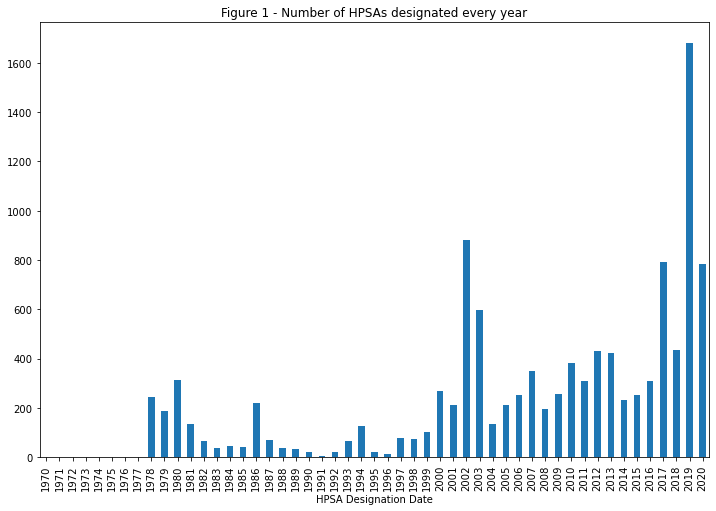

In [33]:
df_filter = df_for_analysis.set_index('HPSA Designation Date').sort_index()
x_labels = df_filter.resample('Y')['HPSA Name'].count().index.strftime('%Y')
figure_1 = df_filter.resample('Y')['HPSA Name'].count().plot.bar(figsize = (12,8), 
                                                         title = 'Figure 1 - Number of HPSAs designated every year')
figure_1.set_xticklabels(x_labels);

Since there is not continuous data before the year 1978, the scope of the analysis will be limited to data from 1978 to 2020. 

In [34]:
df_filter = df_filter['1978':]

### Outliers

In [35]:
numeric_columns = ['HPSA Score','HPSA FTE', 'HPSA Designation Population','% of Population Below 100% Poverty',
                     'HPSA Estimated Underserved Population']

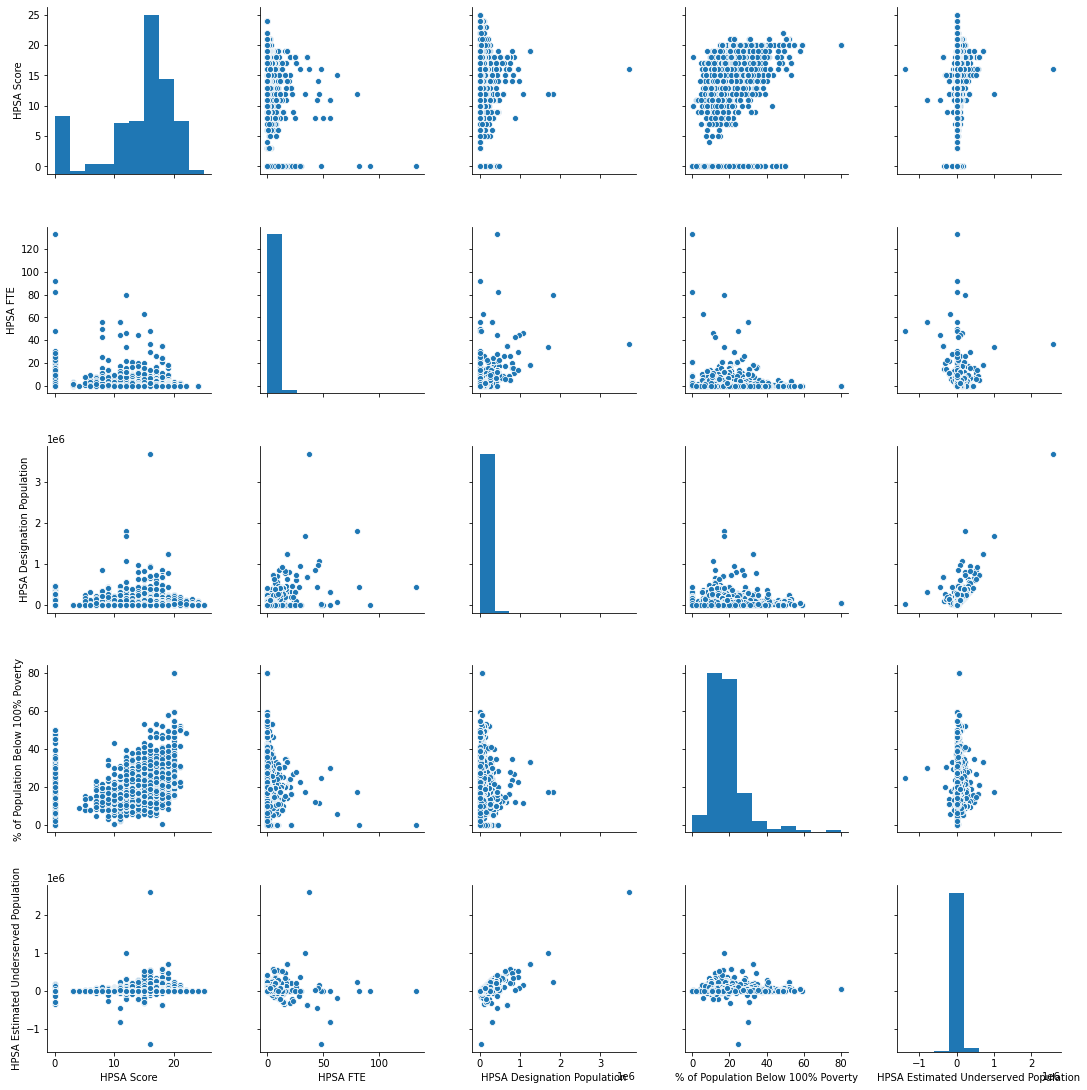

In [36]:
sns.pairplot(df_for_analysis[numeric_columns], height = 3);

In [35]:
# Review outlier 1:
df_for_analysis[df_for_analysis['HPSA Designation Population'] == 3702339.0]

,HPSA Name,Designation Type,HPSA Score,HPSA Status,HPSA Designation Date,HPSA Designation Last Update Date,HPSA Degree of Shortage,Withdrawn Date,HPSA FTE,HPSA Designation Population,% of Population Below 100% Poverty,HPSA Formal Ratio,Primary HHS Region Name,Rural Status,Longitude,Latitude,Common County Name,Common State County FIPS Code,County Equivalent Name,HPSA Component Type Description,HPSA Designation Population Type Description,HPSA Estimated Served Population,HPSA Estimated Underserved Population,HPSA Provider Ratio Goal,HPSA Shortage,State Name,U.S. - Mexico Border 100 Kilometer Indicator,U.S. - Mexico Border County Indicator,Designation,State Population
23248,Maricopa County,Geographic HPSA,16,Withdrawn,2011-03-02,2018-07-02,Not applicable,2018-07-02,37.0,3702339.0,NaN,100063,Region 9,NaN,NaN,NaN,"Maricopa County, AZ",04013,Maricopa,Single County,Geographic Population,1110000.0,2592339.0,30000:1,86.41,Arizona,Y,N,Geographic,7278717.0


This datapoint appears as an outlier in the column "HPSA Designation Population" and "HPSA Estimated Underserved Population". Since it is only one point, it will be removed from the analysis. 

In [37]:
index_to_drop = df_for_analysis[df_for_analysis['HPSA Designation Population']== 3702339.0].index.values.astype(int)
df_for_analysis.drop(index=index_to_drop, inplace=True)

In [38]:
# Review negative values for "HPSA Estimated Underserved Population":
df_for_analysis[df_for_analysis['HPSA Estimated Underserved Population']<0]['HPSA Status'].value_counts()

Withdrawn    124
Name: HPSA Status, dtype: int64

The negative values in column "Underserved Population" correspond to data points with status: "Withdrawn". These are probably negative values because the HPSA was removed from the designated list and therefore, the underserved population is removed as well. For the purposes of this analysis, we will make these values positive to quantify the impact of the withdrawn HPSAs. 

In [39]:
df_for_analysis['HPSA Estimated Underserved Population']=df_for_analysis['HPSA Estimated Underserved Population'].map(
                                                                            lambda cell: cell*-1 if cell<0 else cell)

### Write cleaned dataframes to csv for next steps

In [40]:
# This dataframe is cleaned per the steps above and it is filtered for: dates from 1978 to 2020, 
# combined for census track
df_filter.to_csv(file_path +'03_cleaned_hpsas_filtered.csv', index = True)

In [41]:
# This dataframe is cleaned per the steps above and it is not filtered.
df.to_csv(file_path +'04_cleaned_hpsas_all.csv')